In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

In [ ]:
# Load dataset
data = pd.read_csv("Rainfall_Data_LL.csv")

In [ ]:
data.head()

,Name,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,...,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,June-September,Oct-Dec,Latitude,Longitude
0,ROW1,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,...,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,12.61124,92.83165
1,ROW2,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,...,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,12.61124,92.83165
2,ROW3,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,...,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,12.61124,92.83165
3,ROW4,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,...,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,12.61124,92.83165
4,ROW5,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,...,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,12.61124,92.83165


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4187 entries, 0 to 4186
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            4187 non-null   object 
 1   SUBDIVISION     4187 non-null   object 
 2   YEAR            4187 non-null   int64  
 3   JAN             4187 non-null   float64
 4   FEB             4187 non-null   float64
 5   MAR             4187 non-null   float64
 6   APR             4187 non-null   float64
 7   MAY             4187 non-null   float64
 8   JUN             4187 non-null   float64
 9   JUL             4187 non-null   float64
 10  AUG             4187 non-null   float64
 11  SEP             4187 non-null   float64
 12  OCT             4187 non-null   float64
 13  NOV             4187 non-null   float64
 14  DEC             4187 non-null   float64
 15  ANNUAL          4187 non-null   float64
 16  Jan-Feb         4187 non-null   float64
 17  Mar-May         4187 non-null   f

In [ ]:
data.isnull().sum()

Name              0
SUBDIVISION       0
YEAR              0
JAN               0
FEB               0
MAR               0
APR               0
MAY               0
JUN               0
JUL               0
AUG               0
SEP               0
OCT               0
NOV               0
DEC               0
ANNUAL            0
Jan-Feb           0
Mar-May           0
June-September    0
Oct-Dec           0
Latitude          0
Longitude         0
dtype: int64

In [ ]:
# Assuming 'ANNUAL' is the target variable
X = data.drop(['Name','SUBDIVISION','ANNUAL'], axis=1)  # Exclude non-numeric and target columns
y = data['ANNUAL']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluate Random Forest Regression
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [ ]:
print("Random Forest Regression Metrics:")
print("Mean Squared Error (MSE):", mse_rf)
print("R-squared:", r2_rf)


Random Forest Regression Metrics:
Mean Squared Error (MSE): 7061.593474560955
R-squared: 0.9918635971393225


In [ ]:
threshold = 1500
y_pred_class = (y_pred_rf > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

In [ ]:
## Evaluate Classification Metrics
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
print("Accuracy : ",accuracy_score(y_test_class, y_pred_class))
print("CL Report :",metrics.classification_report(y_test_class,y_pred_class,zero_division=1))
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
print(conf_matrix)

Accuracy :  0.986873508353222
CL Report :               precision    recall  f1-score   support

           0       0.98      1.00      0.99       567
           1       1.00      0.96      0.98       271

    accuracy                           0.99       838
   macro avg       0.99      0.98      0.98       838
weighted avg       0.99      0.99      0.99       838

[[566   1]
 [ 10 261]]


In [ ]:
from sklearn.svm import SVR

In [ ]:
# Standardize features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Support Vector Regression (SVM)
svm_model = SVR(kernel="rbf")
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

In [ ]:
# Evaluate SVM Regression
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

In [ ]:
print("Support Vector Regression (SVM) Metrics:")
print("Mean Squared Error (MSE):", mse_svm)
print("R-squared:", r2_svm)

Support Vector Regression (SVM) Metrics:
Mean Squared Error (MSE): 616520.164523704
R-squared: 0.28964242300738063


In [ ]:
# Convert the problem into a classification task (example threshold: 1500 mm)
threshold = 1500
y_pred_class_svm = (y_pred_svm > threshold).astype(int)
y_test_class_svm = (y_test > threshold).astype(int)

In [ ]:
# Evaluate Classification Metrics for SVM
print("Accuracy :" ,accuracy_score(y_test_class_svm, y_pred_class_svm))
print("CL Report :" , metrics.classification_report(y_test_class_svm, y_pred_class_svm,zero_division=1))
conf_matrix_svm = confusion_matrix(y_test_class_svm, y_pred_class_svm)
print(conf_matrix_svm)

Accuracy : 0.8198090692124105
CL Report :               precision    recall  f1-score   support

           0       0.79      1.00      0.88       567
           1       1.00      0.44      0.61       271

    accuracy                           0.82       838
   macro avg       0.89      0.72      0.75       838
weighted avg       0.86      0.82      0.80       838

[[567   0]
 [151 120]]


In [ ]:
rf_prediction  = rf_model.predict(X_test)
svm_prediction  = svm_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [ ]:
# Plot predictions vs. actual values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Text(0, 0.5, 'Predicted')

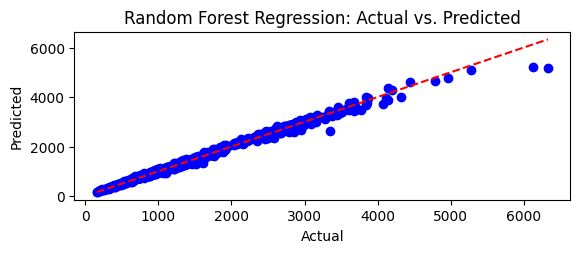

In [ ]:
plt.subplot(2, 1, 1)
plt.scatter(y_test, rf_prediction, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('Random Forest Regression: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

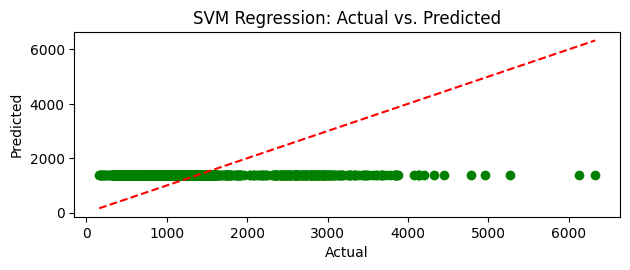

In [ ]:
plt.subplot(2, 1, 2)
plt.scatter(y_test, svm_prediction, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('SVM Regression: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, roc_curve, auc
# Evaluate the model using Mean Squared Error
rf_mse = mean_squared_error(y_test, rf_prediction)
print("Random Forest Mean Squared Error:", rf_mse)

Random Forest Mean Squared Error: 7061.593474560955


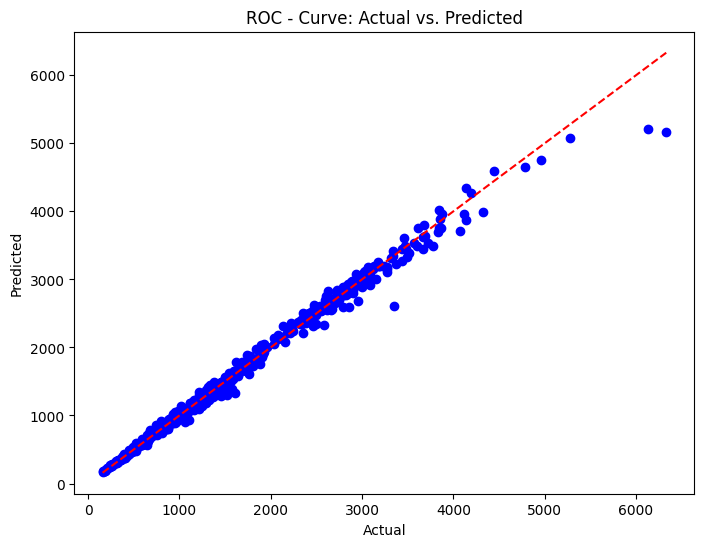

In [ ]:
# Scatter plot of predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_prediction, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('ROC - Curve: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

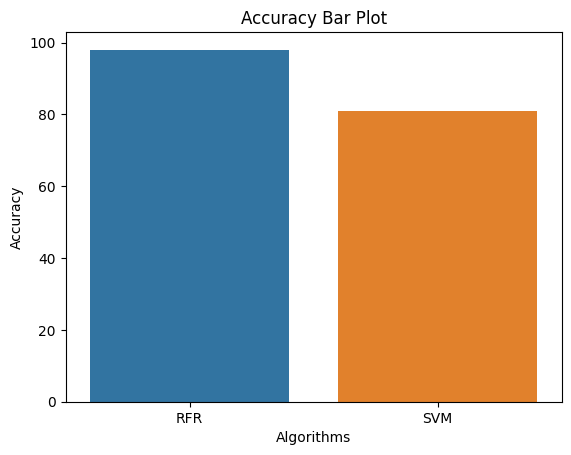

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Sample data for demonstration
categories = ['RFR','SVM']
values = [98,81]
bar_color = 'maroon'
# Create a bar plot using Seaborn
sns.barplot(x=categories, y=values)

# Add labels and title
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Bar Plot')

# Show the plot
plt.show()

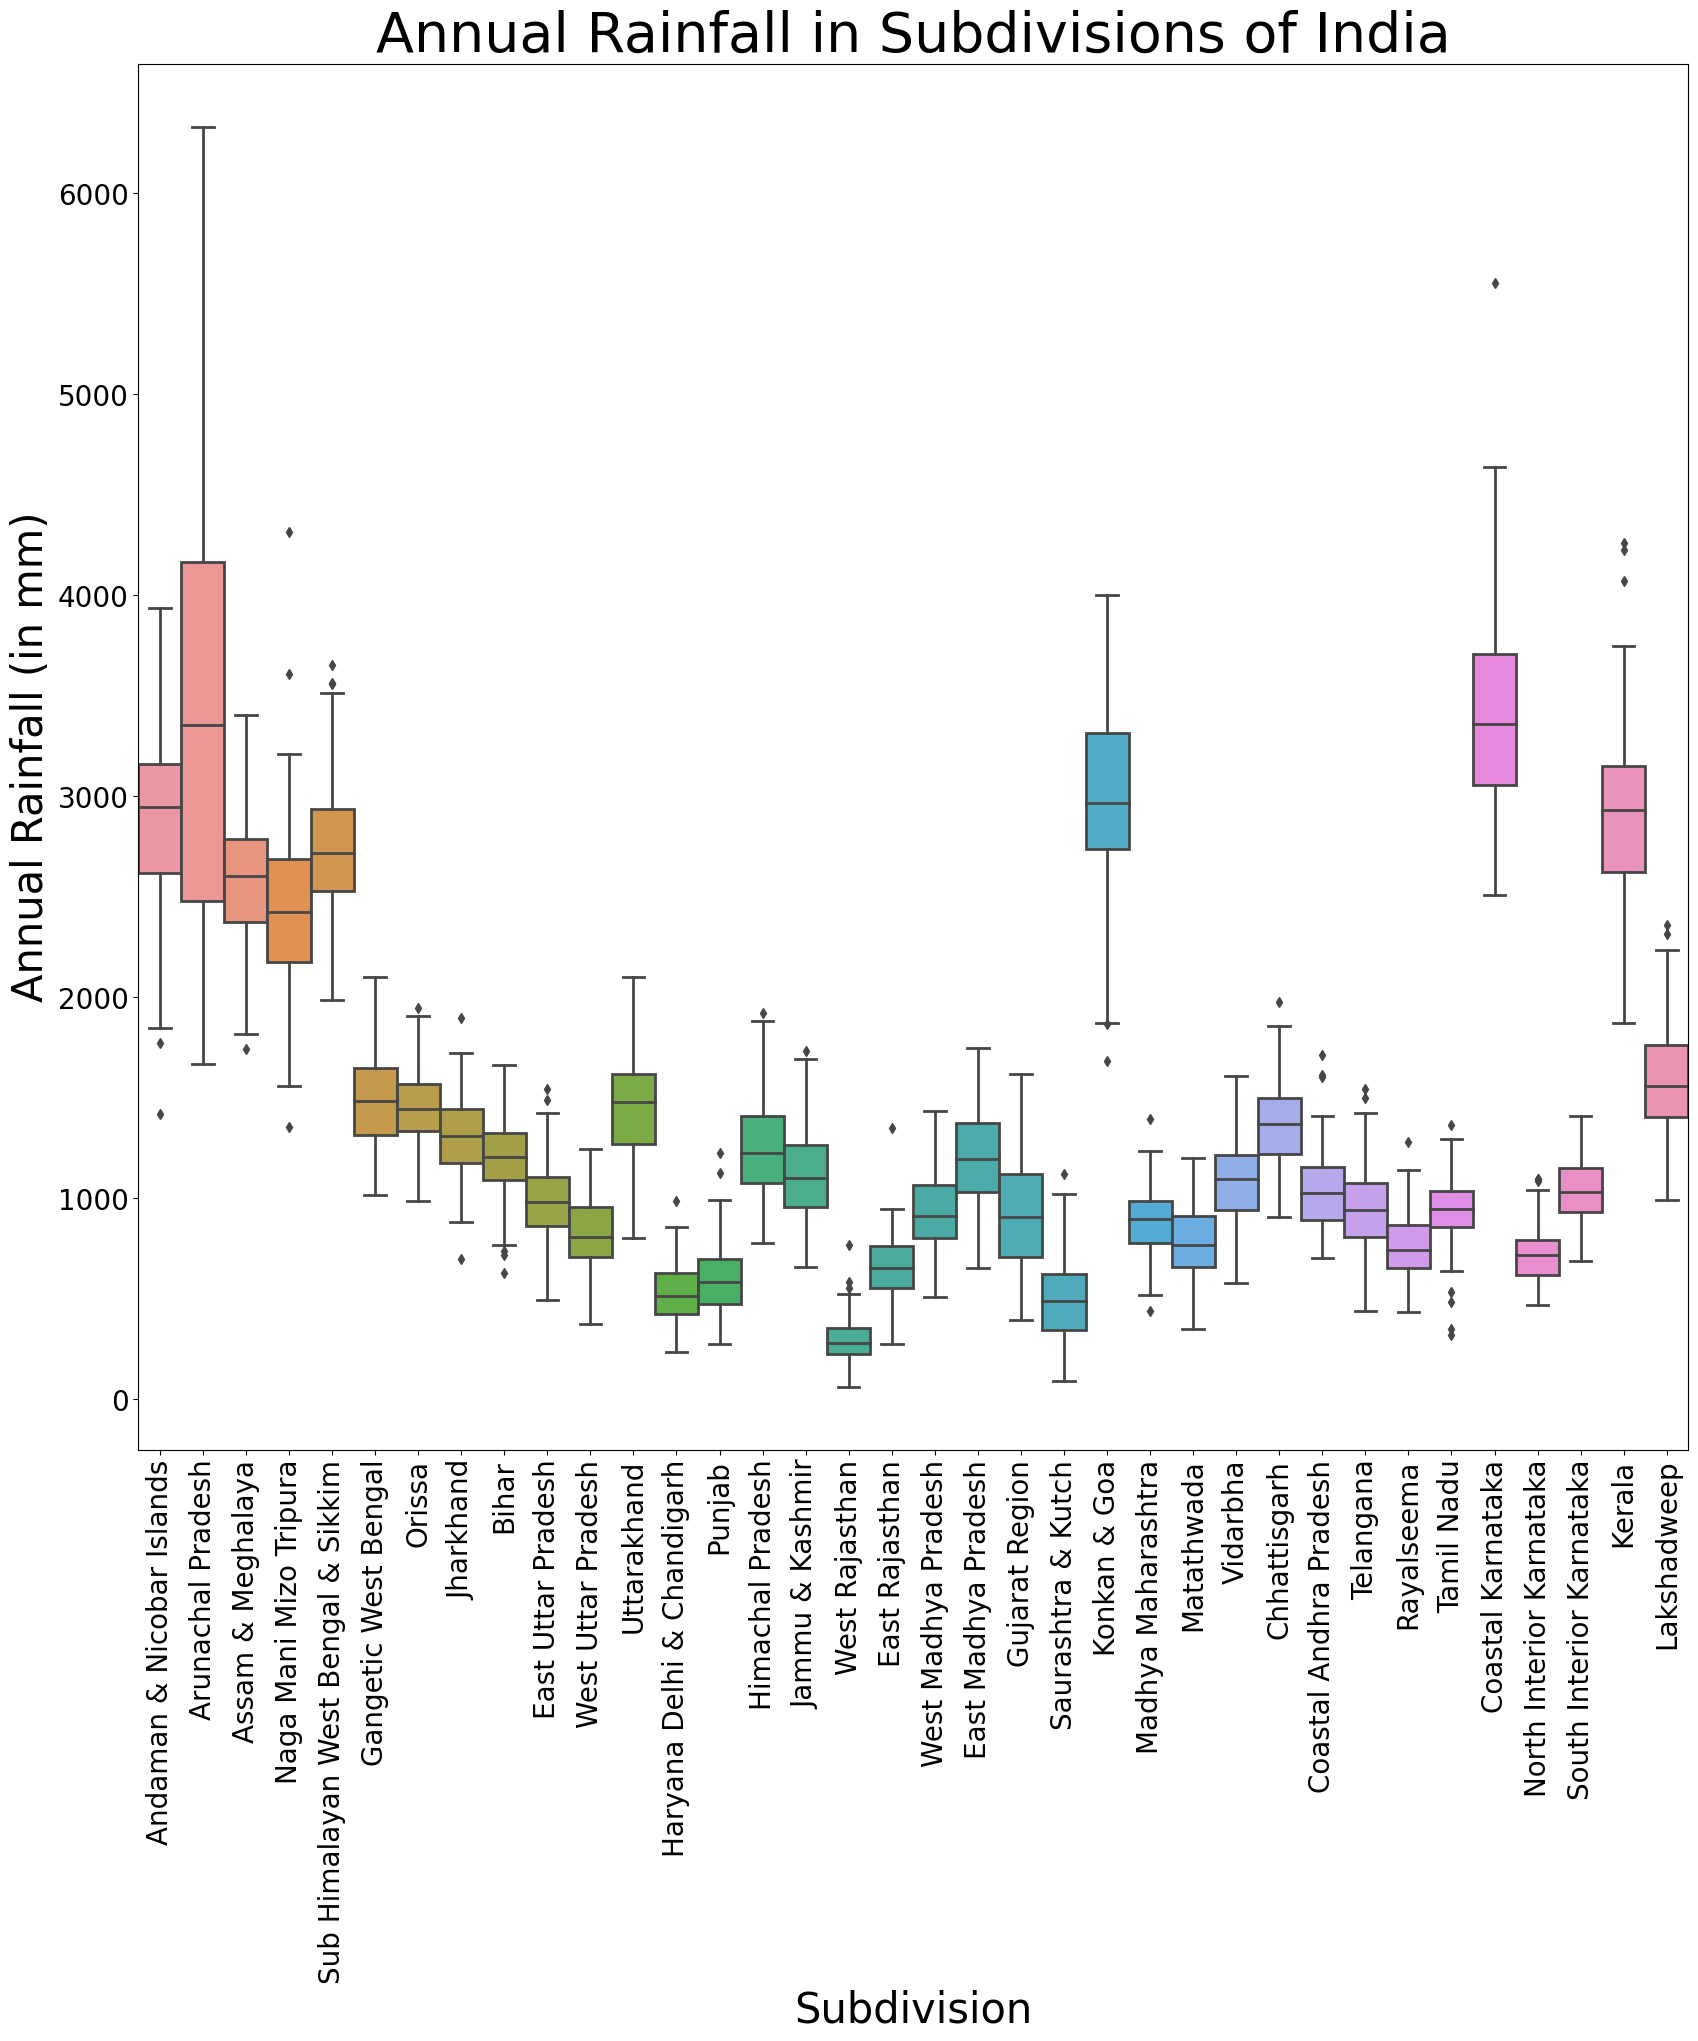

In [ ]:
# Annual rainfall in subdivisions of India
import seaborn as sns
plt.figure(figsize=(20,18))
ax = sns.boxplot(x="SUBDIVISION", y="ANNUAL", data=data, width=1, linewidth=2)
ax.set_xlabel('Subdivision',fontsize=30)
ax.set_ylabel('Annual Rainfall (in mm)',fontsize=30)
plt.title('Annual Rainfall in Subdivisions of India',fontsize=40)
ax.tick_params(axis='x', labelsize=20, rotation=90)
ax.tick_params(axis='y', labelsize=20, rotation=0)

*Clearly we can see that Arunachal Pradesh has recorded maximum rainfall annually but its median is similar to Coastal Karnataka.*

In [ ]:
# Getting to know which SUBDIVISION receives maximum rainfall in India annually
data[['SUBDIVISION', 'ANNUAL']].sort_values(by='ANNUAL', ascending = False).head(20)

,SUBDIVISION,ANNUAL
144,Arunachal Pradesh,6331.100000
134,Arunachal Pradesh,6129.100000
117,Arunachal Pradesh,5691.400000
3664,Coastal Karnataka,5553.900000
114,Arunachal Pradesh,5486.300000
124,Arunachal Pradesh,5272.700000
123,Arunachal Pradesh,5253.200000
151,Arunachal Pradesh,5063.500000
157,Arunachal Pradesh,4959.300000
145,Arunachal Pradesh,4874.800000


In [ ]:
drought_threshold = 25  # mm
moderate_rain_threshold = 50
heavy_rain_threshold = 100
flood_threshold = 150


In [36]:
rainfall_data = [50, 120, 0, 85, 25, 150, 0, 90, 30]  # Replace with your actual data

heavy_rain_threshold = 100  # mm
no_rain_threshold = 5  # mm

heavy_rain_count = 0
no_rain_count = 0

In [37]:
heavy_rain_threshold = 100  # mm
no_rain_threshold = 5  # mm

heavy_rain_count = 0
no_rain_count = 0

for rainfall_amount in rainfall_data:
    if rainfall_amount >= heavy_rain_threshold:
        heavy_rain_count += 1
    elif rainfall_amount <= no_rain_threshold:
        no_rain_count += 1

print("Frequency of heavy rainfall")


Frequency of heavy rainfall
